In [1]:
%cd ..
%pip install -e .

/home/sandor/dtu/2021-22-spring/advanced_machine_learning/p-reg
Obtaining file:///home/sandor/dtu/2021-22-spring/advanced_machine_learning/p-reg
  Preparing metadata (setup.py) ... done
  Attempting uninstall: src
    Found existing installation: src 0.1.0
    Uninstalling src-0.1.0:
      Successfully uninstalled src-0.1.0
  Running setup.py develop for src
Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['patch.edgecolor'] = 'black'
plt.rcParams['patch.linewidth'] = 2


In [33]:
df = pd.read_csv('reports/figures/mu_for_128neur.csv')
df.head()
df_64 = pd.read_csv('reports/figures/fig2c_alt.csv')


In [34]:
df

,Unnamed: 0,model,reg,seed,mu,train_acc,val_acc,test_acc
0,0,gcn,preg_loss,0,0.0,1.0000,0.790,0.813
1,1,gcn,preg_loss,0,0.1,1.0000,0.794,0.821
2,2,gcn,preg_loss,0,0.2,1.0000,0.816,0.824
3,3,gcn,preg_loss,0,0.3,1.0000,0.816,0.830
4,4,gcn,preg_loss,0,0.4,1.0000,0.816,0.831
5,5,gcn,preg_loss,0,0.5,1.0000,0.806,0.835
6,6,gcn,preg_loss,0,0.6,1.0000,0.796,0.832
7,7,gcn,preg_loss,0,0.7,1.0000,0.794,0.835
8,8,gcn,preg_loss,0,0.8,1.0000,0.794,0.837
9,9,gcn,preg_loss,0,0.9,1.0000,0.796,0.836


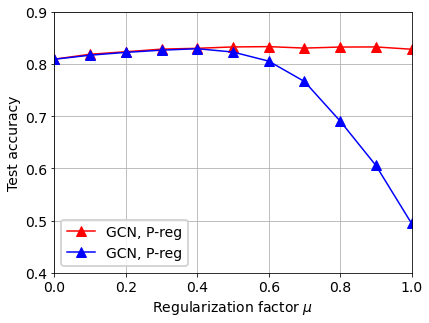

In [43]:
df = df.groupby(by=['model', 'reg', 'mu'], as_index=False).mean()
df_64 = df_64.groupby(by=['model', 'reg', 'mu'], as_index=False).mean()

stds = df.groupby(by=['model', 'reg', 'mu'], as_index=False).std()

fig, ax = plt.subplots(figsize=(6.4,4.8))

ax.plot(df['mu'], df['test_acc'], '-^r', label='GCN, P-reg', ms=10)
filt = (df_64['model'] == 'gcn') & (df_64['reg'] == 'preg_loss')
ax.plot(df_64[filt]['mu'], df_64[filt]['test_acc'], '-^b', label='GCN, P-reg', ms=10)

ax.set(xlim=(0, 1), ylim=(.4, .9), xlabel='Regularization factor $\mu$', ylabel='Test accuracy')
ax.legend(loc='lower left')


ax.grid(True)
plt.savefig('reports/figures/slide_mu/128_1.png', dpi=300)
plt.show()